# Sequential Monte Carlo Filtering an Example

Test the example given in  https://www.sas.upenn.edu/~jesusfv/ejemplo.pdf.

The model consist of two equations, one for the latent variable $x_t$ and one for the observed variable $y_t$:

\begin{align}
x_t &= 0.5 + 0.3 \frac{x_{t-1}}{1+x^2_{t-1}} + w_t \\
y_t &= x_t + v_t,
\end{align}

where  $w_t \sim \mathcal{N}(0,1)$ and $v_t \sim t(2)$.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [16]:
def model(x0, T, samplewt, samplevt, rng = None):
    """ Generates a sample from the model defined above.
    
    args
    ----
    samplewt: function to sample from wt
    
    samplevt: function to sample from vt
    """
    rng = np.random.default_rng(rng)
    
    xT = np.zeros(T+1)
    xT[0] = x0
    yT = np.zeros(T)
    
    for t in range(T):
        xT[t+1] = 0.5 + 0.3 * (xT[t] / (1+xT[t]**2)) + samplewt()
        yT[t] = xT[t+1] + samplevt(2)
    
    return [xT, yT]

In [17]:
seed = 42
rng = np.random.default_rng(seed)
T = 100
x0 = 0
samplewt = rng.normal
samplevt = rng.standard_t

[xt, yt] = model(x0, T, samplewt, samplevt, rng)

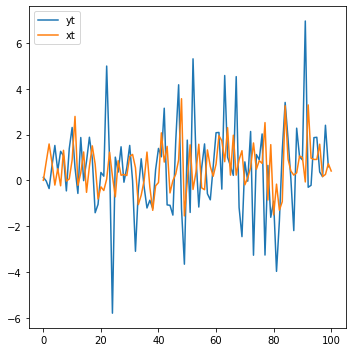

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(yt, label='yt')
ax.plot(xt, label='xt')

ax.legend()
plt.tight_layout()

In [58]:
def resamp(p, x, M, rng=None):
    """ Resample x multionimally according to probs p.
    Equivalently, one can draw uniformly with appropriate bins ;)
    """
    rng = np.random.default_rng(rng)
    return x[np.where(rng.multinomial(1, p, size=M) == 1)[1]]

def smc(x0, M, T, rng=None):
    XT = np.zeros((M, T))
    VT = np.zeros((M,T))
    QT = np.zeros((M,T))
    WT = np.zeros((M, T))


    for t in range(T):

        WT[:, t] = rng.normal(size=M)
        XT[:, t] = 0.5 + 0.3 * (x0/ (1+x0^2)) + WT[:, t]
        VT[:, t] = yt[t] -  XT[:, t]

        QT[:, t] = scipy.stats.t.pdf(x = VT[:, t], df = 2)
        QT[:, t] /= np.sum(QT[:, t])

        XT[:, t] = resamp(QT[:, t], XT[:, t], M, rng)
        
    return [XT, VT, QT, WT]

In [64]:
rng = np.random.default_rng(seed)
M = 5 
T = 100
x0 = 0
[XT, VT, QT, WT] = smc(x0, M, T, rng=rng)

In [33]:
scipy.stats.t.pdf(x = [1, 2], df=2)

array([0.19245009, 0.06804138])

In [24]:
wt.shape

(5,)